In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [186]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [187]:
def linear(x, m, b):
    return m*x + b

def calc_modulus(x, y):
    """
    Calculate the slope of the linear fit to the data.
    """
    popt, pcov = sp.optimize.curve_fit(linear, x, y)
    return popt[0], popt[1]

18.473375910300316
128820.43714910465


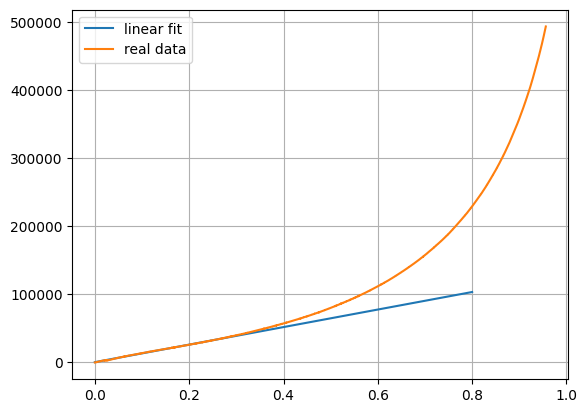

In [188]:

ethafoam = pd.read_csv('17_ethafoam_compression.csv', on_bad_lines='skip')
ethafoam_data = np.array(ethafoam)[5:,:].astype(float)

# linear region
ethafoam_data = ethafoam_data[ethafoam_data[:,2] > 1]  # remove initial setting data points
ethafoam_data = ethafoam_data[ethafoam_data[:,2] < 1e3]  # remove final data points
ethafoam_data -= ethafoam_data[0]

diameter = 50.75 / 1000 # m
ethafoam_thickness = 25 # mm
ethafoam_area = np.pi * (diameter/2)**2 # mm^2
ethafoam_density = ( 5.4 * 1e-3) /  ( 292312.5706 * 1e-9 )
print(ethafoam_density)

ethafoam_strain = ethafoam_data[:,1] / ethafoam_thickness
ethafoam_stress = ethafoam_data[:,2] / ethafoam_area

ethafoam_E, c = calc_modulus(ethafoam_strain[:2000], ethafoam_stress[:2000])
x = np.linspace(0, 0.8, 100)
plt.plot(x, linear(x, ethafoam_E, c), label = 'linear fit')
print(ethafoam_E)

plt.plot(ethafoam_strain, ethafoam_stress, label = 'real data')
plt.legend()
plt.grid()
plt.show()

13.25836331531401
243450.00867619773


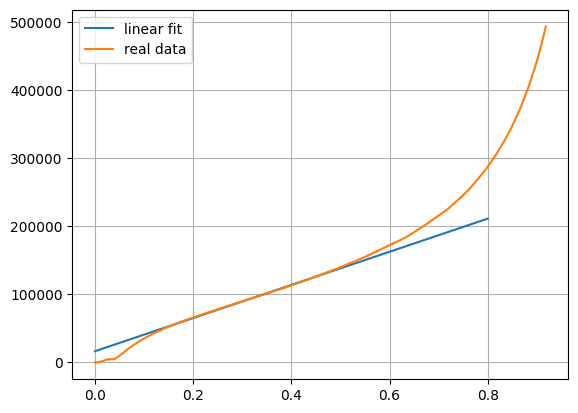

In [189]:

polystyrene_df = pd.read_csv('17_polystyrene_compression.csv', on_bad_lines='skip')
polystyrene_data = np.array(polystyrene_df)[5:,:].astype(float)

polystyrene_data = polystyrene_data[polystyrene_data[:,2] > 1] # remove initial setting data points
polystyrene_data = polystyrene_data[polystyrene_data[:,2] < 1e3] # remove final data points
polystyrene_data -= polystyrene_data[0,:]  # subtract initial setting data points

diameter = 50.75 / 1000 # m
polystyrene_thickness = 13.5 # mm
polystyrene_area = np.pi * (diameter/2)**2 # mm^2
polystyrene_density = ( 3.3 * 1e-3) /  ( 248899.5 * 1e-9 )
print(polystyrene_density)

polystyrene_strain = polystyrene_data[:,1] / polystyrene_thickness
polystyrene_stress = polystyrene_data[:,2] / polystyrene_area

polystyrene_E, c = calc_modulus(polystyrene_strain[1000:2000], polystyrene_stress[1000:2000])
plt.plot(x, linear(x, polystyrene_E, c), label = 'linear fit')
print(polystyrene_E)

plt.plot(polystyrene_strain, polystyrene_stress, label = 'real data')
plt.legend()
plt.grid()
plt.show()

26.387148024923782
23507.26612213483


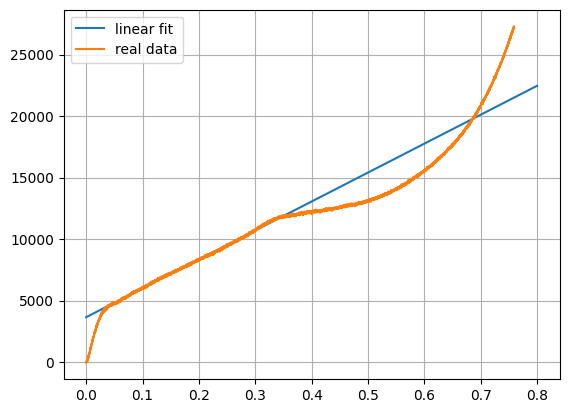

In [190]:

polyurethane_df = pd.read_csv('17_polyurethane_compression.csv', on_bad_lines='skip')
polyurethane_data = np.array(polyurethane_df)[12:,:].astype(float)

polyurethane_data = polyurethane_data[polyurethane_data[:,2] > 1] # remove initial data points
polyurethane_data = polyurethane_data[polyurethane_data[:,2] < 1e4] # remove final data points
polyurethane_data -= polyurethane_data[0,:] # subtract initial data point

diameter = 50.75 / 1000 # m
polyurethane_thickness = 25.07 # mm
polyurethane_area = np.pi * (diameter/2)**2 # mm^2
polyurethane_density = ( 4.3 * 1e-3) /  ( 162958.1187 * 1e-9 )
print(polyurethane_density)

polyurethane_strain = polyurethane_data[:,1] / polyurethane_thickness
polyurethane_stress = polyurethane_data[:,2] / polyurethane_area

polyurethane_E, c = calc_modulus(polyurethane_strain[700:2500], polyurethane_stress[700:2500])
x = np.linspace(0, 0.8, 100)
plt.plot(x, linear(x, polyurethane_E, c), label = 'linear fit')
print(polyurethane_E)

plt.plot(polyurethane_strain, polyurethane_stress, label = 'real data')
plt.legend()
plt.grid()
plt.show()

20.30788665104327
172855.38634861715


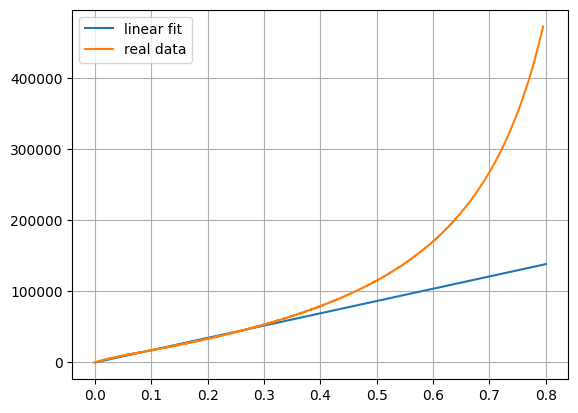

In [191]:

white_foam_df = pd.read_csv('17_white_foam_compression.csv', on_bad_lines='skip')
white_foam_data = np.array(white_foam_df)[12:,:].astype(float)

white_foam_data = white_foam_data[white_foam_data[:,1] > 1] # remove initial data points
white_foam_data = white_foam_data[white_foam_data[:,2] < 6e2] # remove final data points
white_foam_data -= white_foam_data[0,:] # subtract initial data point

white_foam_thickness = 20.37 # mm
white_foam_area = 1237.83440723 * 1e-6 # m^2
white_foam_density = ( 2.1 * 1e-3) /  ( 103408.1013 * 1e-9 )
print(white_foam_density)

white_foam_strain = white_foam_data[:,1] / white_foam_thickness
white_foam_stress = white_foam_data[:,2] / white_foam_area

white_foam_E, c = calc_modulus(white_foam_strain[:2000], white_foam_stress[:2000])
x = np.linspace(0, 0.8, 100)
plt.plot(x, linear(x, white_foam_E, c), label = 'linear fit')
print(white_foam_E)

plt.plot(white_foam_strain, white_foam_stress, label = 'real data')
plt.legend()
plt.grid()
plt.show()

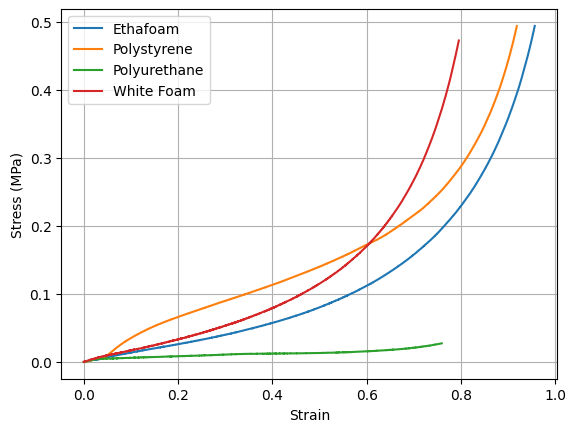

In [192]:
# plot the 4 materials on the same graph

plt.plot(ethafoam_strain, ethafoam_stress * 1e-6, label='Ethafoam')
plt.plot(polystyrene_strain, polystyrene_stress * 1e-6, label='Polystyrene')
plt.plot(polyurethane_strain, polyurethane_stress * 1e-6, label='Polyurethane')
plt.plot(white_foam_strain, white_foam_stress * 1e-6, label='White Foam')

plt.ylabel('Stress (MPa)')
plt.xlabel('Strain')
plt.legend()
plt.grid()

plt.savefig('stress_vs_strain.png', dpi=300)
plt.show()

In [193]:
def closest_index(array, value):
    return np.abs(array - value).argmin()

def performance_index(strain_data, stress_data, fragility):
    # find the index of the strain that corresponds to the fragility
    fragility_index = closest_index(stress_data, fragility)
    # calculate the performance index
    performance_index = np.trapz(stress_data[:fragility_index], strain_data[:fragility_index])
    return performance_index

performance_index(white_foam_strain, white_foam_stress, 0.04e6)


4705.697498666855

In [194]:

def draw_performance_curve(strain_data, stress_data, label, density=None):
    fragilities = np.logspace(4, 5.5, 100)
    performance_indices = np.zeros(len(fragilities))

    if density is None:
        density = 1
    
    for i, fragility in enumerate(fragilities):
        performance_indices[i] = performance_index(strain_data, stress_data, fragility) / density
    
    plt.semilogx(fragilities, performance_indices, label = label)
    
    return fragilities, performance_indices


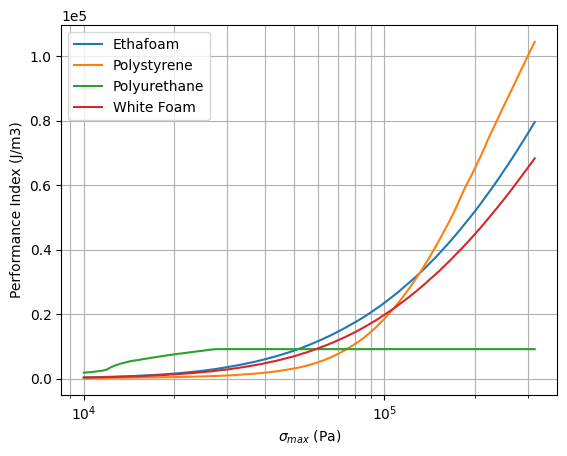

In [204]:
# draw the vol performance curves for each material
draw_performance_curve(ethafoam_strain, ethafoam_stress, 'Ethafoam')
draw_performance_curve(polystyrene_strain, polystyrene_stress, 'Polystyrene')
draw_performance_curve(polyurethane_strain, polyurethane_stress, 'Polyurethane')
draw_performance_curve(white_foam_strain, white_foam_stress, 'White Foam')

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Performance Index (J/m3)')
plt.xlabel('$\sigma_{max}$ (Pa)')
plt.legend()
plt.grid(True, 'both')

plt.savefig('vol_performance_vs_fragility',dpi = 300)
plt.show()

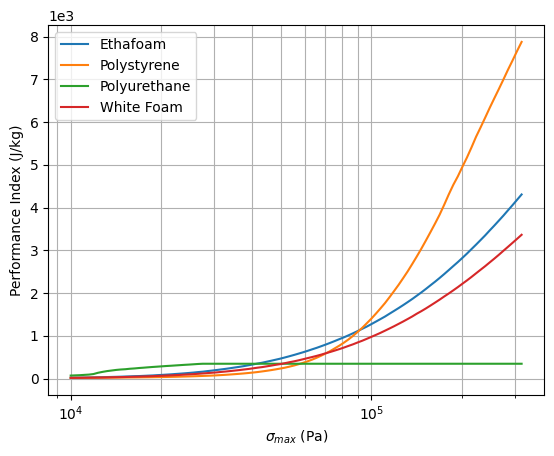

In [200]:
# draw the mass performance curves for each material
draw_performance_curve(ethafoam_strain, ethafoam_stress, 'Ethafoam', ethafoam_density)
draw_performance_curve(polystyrene_strain, polystyrene_stress, 'Polystyrene', polystyrene_density)
draw_performance_curve(polyurethane_strain, polyurethane_stress, 'Polyurethane', polyurethane_density)
draw_performance_curve(white_foam_strain, white_foam_stress, 'White Foam', white_foam_density)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylabel('Performance Index (J/kg)')
plt.xlabel('$\sigma_{max}$ (Pa)')
plt.legend()
plt.grid(True, 'both')

plt.savefig('mass_performance_vs_fragility',dpi = 300)
plt.show()

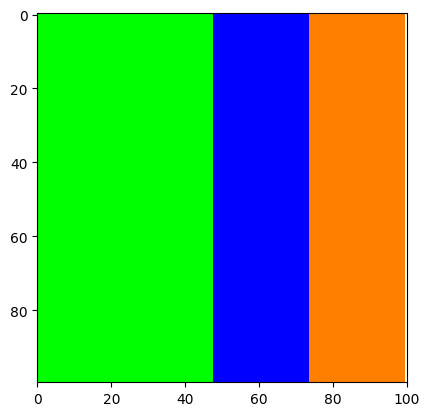

In [197]:

fragilities = np.logspace(4, 5.5, 100)
masses = np.linspace(0, 2, 100)[::-1]

img = np.zeros((len(fragilities), len(masses), 3))
colours = [(0,0,1),(1,0.5,0),(0,1,0),(1,0,0)]

for i,m in enumerate(masses):
    for j,f in enumerate(fragilities):
        indicies = np.zeros(4)
        indicies[0] = performance_index(ethafoam_strain, ethafoam_stress, f)
        indicies[1] = performance_index(polystyrene_strain, polystyrene_stress, f)
        indicies[2] = performance_index(polyurethane_strain, polyurethane_stress, f)
        indicies[3] = performance_index(white_foam_strain, white_foam_stress, f)
        img[i,j] = colours[indicies.argmax()]

fig,ax=plt.subplots(1,1)
cp = ax.imshow(img)
ax.set_xlim(0,100)
plt.show()

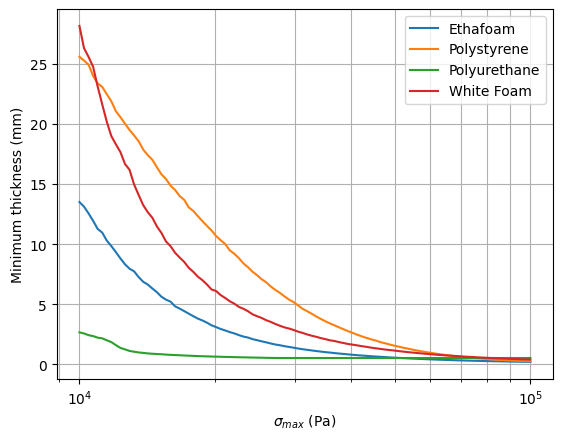

In [203]:
# minimum thickness of packaging material graph
def draw_thickness_curve(strain_data, stress_data, area, label):
    fragilities = np.logspace(4, 5, 100)
    thicknesses = np.zeros(len(fragilities))

    m = 1
    g = 9.81
    h = 1
    
    for i, fragility in enumerate(fragilities):
        thicknesses[i] = m*g*h / (area * performance_index(strain_data, stress_data, fragility))
    
    plt.semilogx(fragilities, thicknesses, label = label)
    
    return fragilities, thicknesses

draw_thickness_curve(ethafoam_strain, ethafoam_stress, ethafoam_area, 'Ethafoam')
draw_thickness_curve(polystyrene_strain, polystyrene_stress, polystyrene_area,  'Polystyrene')
draw_thickness_curve(polyurethane_strain, polyurethane_stress, polyurethane_area, 'Polyurethane')
draw_thickness_curve(white_foam_strain, white_foam_stress, white_foam_area, 'White Foam')

plt.ylabel('Minimum thickness (mm)')
plt.xlabel('$\sigma_{max}$ (Pa)')
plt.legend()
plt.grid(True, 'both')

plt.savefig('thickness_vs_fragility',dpi = 300)
plt.show()